In [1]:
# importing dependencies
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import string
from wordcloud import WordCloud
from PIL import Image
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from plotly import subplots, tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
# importing csv file
womens_clothing_data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# now transposing the dataframe to convert columns to rows
womens_clothing_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Clothing ID,767,1080,1077,1049,847
Age,33,34,60,50,47
Title,NaN,NaN,Some major design flaws,My favorite buy!,Flattering shirt
Review Text,Absolutely wonderful - silky and sexy and comf...,Love this dress! it's sooo pretty. i happene...,I had such high hopes for this dress and reall...,"I love, love, love this jumpsuit. it's fun, fl...",This shirt is very flattering to all due to th...
Rating,4,5,3,5,5
Recommended IND,1,1,0,1,1
Positive Feedback Count,0,4,0,0,6
Division Name,Initmates,General,General,General Petite,General
Department Name,Intimate,Dresses,Dresses,Bottoms,Tops


# Inspecting Our Dataframe

In [4]:
womens_clothing_data.shape

(23486, 11)

In [5]:
womens_clothing_data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
womens_clothing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
womens_clothing_data[womens_clothing_data['Title'].isnull()]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...,...
23450,23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses
23458,23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [8]:
womens_clothing_data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

# Cleaning our Dataframe

In [9]:
# cleaning up Title & Review Text Features
womens_clothing_data['Title'] = womens_clothing_data['Title'].replace('nan',np.NaN)
womens_clothing_data.dropna(subset=['Title'], how='all', inplace = True)
womens_clothing_data['Review Text'] = womens_clothing_data['Review Text'].replace('nan',np.NaN)
womens_clothing_data.dropna(subset=['Review Text'], how='all', inplace = True)

In [10]:
# grabbing the most popular value of important features
mode_division = womens_clothing_data['Division Name'].mode()[0]
mode_department = womens_clothing_data['Department Name'].mode()[0]
mode_class = womens_clothing_data['Class Name'].mode()[0]

# replacing NaN columns with mode value
womens_clothing_data['Division Name'] = womens_clothing_data['Division Name'].fillna(mode_division)
womens_clothing_data['Department Name'] = womens_clothing_data['Department Name'].fillna(mode_division)
womens_clothing_data['Class Name'] = womens_clothing_data['Class Name'].fillna(mode_division)

In [11]:
# reviewing clean up dataframe
womens_clothing_data[["Title", "Division Name","Department Name","Class Name","Review Text"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13992,Love it!,136
Division Name,3,General,11677
Department Name,7,Tops,8713
Class Name,21,Dresses,5371
Review Text,19669,Perfect fit and i've gotten so many compliment...,3


In [12]:
# reviewing actual data
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [13]:
# calculating sentiment feature
SentAnalyzer = SentimentIntensityAnalyzer()
womens_clothing_data['Title'] = womens_clothing_data['Title'].astype(str)
womens_clothing_data['Polarity Score'] = womens_clothing_data['Title'].apply(lambda x:SentAnalyzer.polarity_scores(x)['compound'])
womens_clothing_data['Sentiment'] = ''
womens_clothing_data.loc[womens_clothing_data['Polarity Score'] > 0,'Sentiment'] = 'Positive'

womens_clothing_data.loc[womens_clothing_data['Polarity Score'] < 0,'Sentiment'] = 'Negative'
womens_clothing_data.loc[womens_clothing_data['Polarity Score'] == 0,'Sentiment'] = 'Neutral'
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score,Sentiment
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0000,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5093,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.3182,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.0000,Neutral
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.5106,Positive


# Exporting cleaned up data to CSV for Tableau Visualization

In [14]:
womens_clothing_data.to_csv("Womens_Clothing_Data_For_Tableau.csv", index=False, encoding='utf-8')

In [15]:
# Setting up the seaborn plot
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(12.0,12.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15}) 

# Customer Rating vs Age Groups

In [16]:
age = pd.cut(womens_clothing_data['Age'],bins = [0, 25, 45, 60, 75, 100],labels = ['<=25', '<=45', '<=60', '<=75', '<=100',])
print("Customer Age Group Count:")
print(age.value_counts().sort_values())

Customer Age Group Count:
<=100      144
<=25       993
<=75      1898
<=60      5679
<=45     10961
Name: Age, dtype: int64


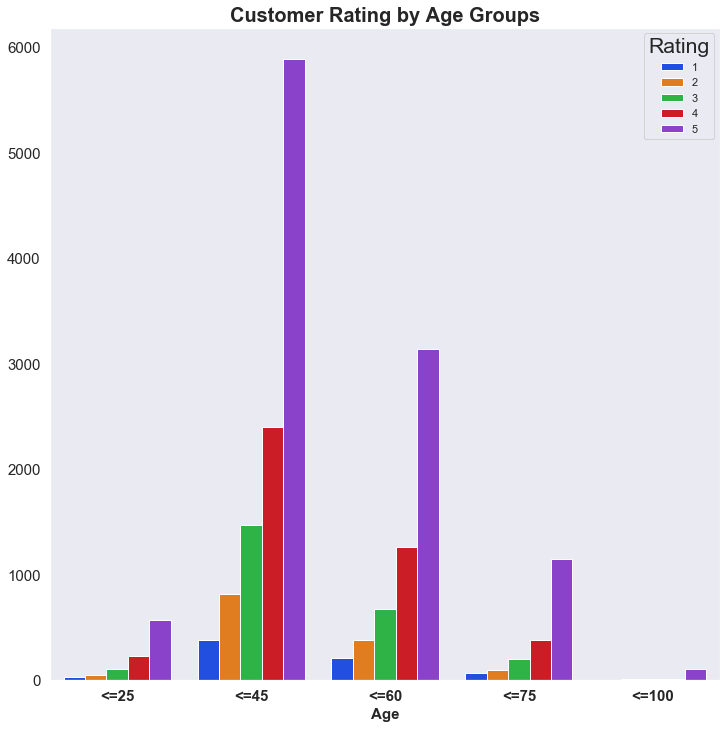

In [17]:
sns.countplot(x=age,hue=womens_clothing_data['Rating'], palette = sns.color_palette('bright', 5))
plt.title("Customer Rating by Age Groups",fontsize=20,fontweight='bold')
plt.ylabel("")
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.show()

# Sentiment vs Rating by Department

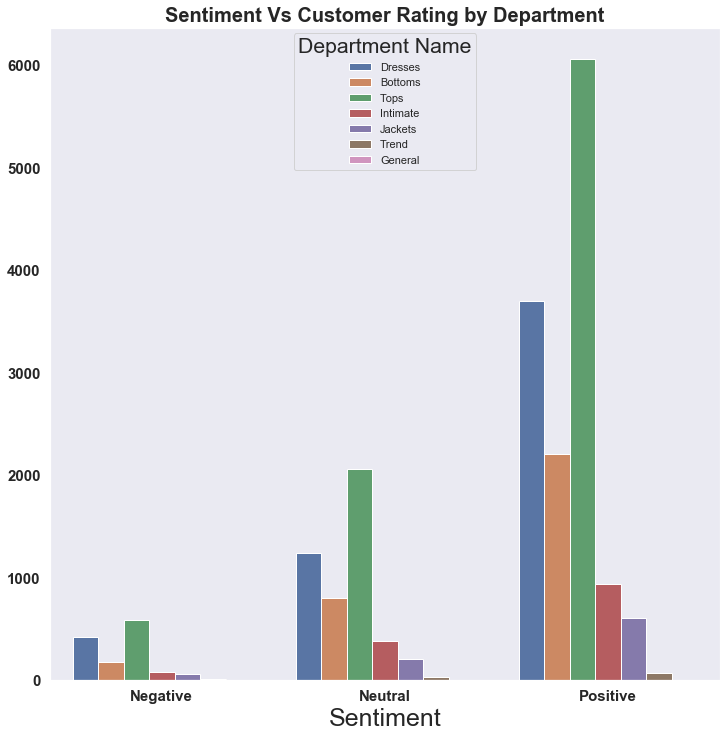

In [18]:
xvar = "Sentiment"
huevar = "Rating"
rowvar = "Department Name"

sns.countplot(x=xvar,hue=rowvar,data=womens_clothing_data,
         order=["Negative","Neutral","Positive"])
plt.title("Sentiment Vs Customer Rating by Department",fontsize=20,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.ylabel("")
plt.show()

## Visualization of Relationship Between Rating, Class Name and Age

In [19]:
womens_clothing_data_plot=womens_clothing_data['Rating'].value_counts().to_frame()
avgdf1 = womens_clothing_data.groupby('Class Name').agg({'Rating': np.average})
avgdf2 = womens_clothing_data.groupby('Class Name').agg({'Age': np.average})
avgdf3 = womens_clothing_data.groupby('Rating').agg({'Age': np.average})

trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['Rating'],2),
    marker=dict(
        color=avgdf1['Rating'],
        colorscale = 'RdBu')
)
trace2 = go.Bar(
    x=womens_clothing_data_plot.index,
    y=womens_clothing_data_plot.Rating,
    marker=dict(
        color=womens_clothing_data_plot['Rating'],
        colorscale = 'RdBu')
)
trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['Age'],2),
    marker=dict(
        color=avgdf2['Age'],
        colorscale = 'RdBu')
)
trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['Age'],2),
    marker=dict(
        color=avgdf3['Age'],
        colorscale = 'Reds')
)

fig = subplots.make_subplots(rows=2, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='Class')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='Class')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='Rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900,showlegend=False, title="Visualization of Relationship Between Rating, Class Name and Age")
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)',
                   'paper_bgcolor':'rgba(0,0,0,0)'})
py.iplot(fig);

## Average Rating Vs Class & Number of Reviewers

In [20]:
cv = womens_clothing_data['Class Name'].value_counts()

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating Vs Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Reviews'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Correlation Heatmap Plots: Division, Department, and Class against each other

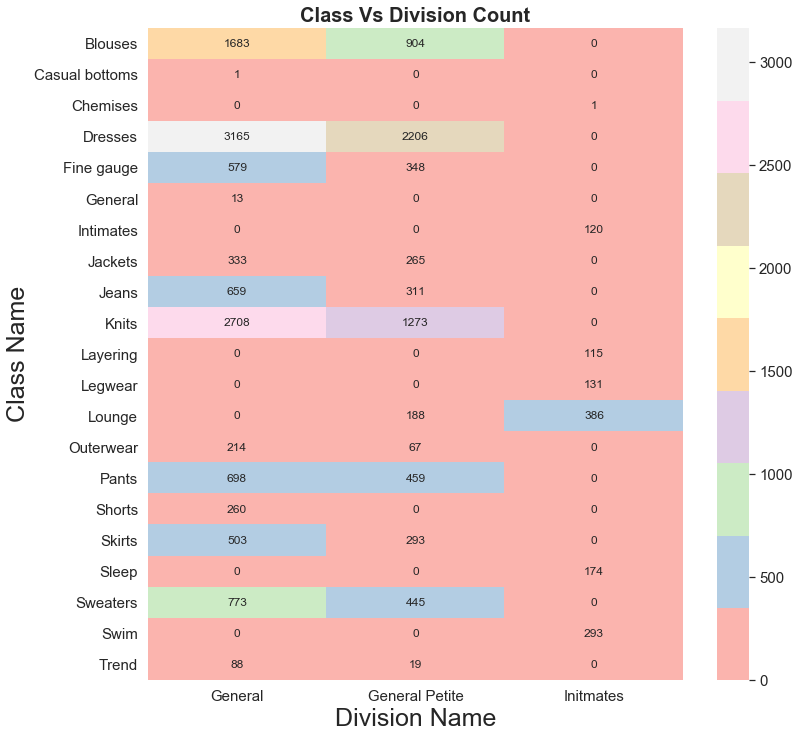

In [21]:
# Class Vs Division Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Class Name'], womens_clothing_data["Division Name"]),
            annot=True,fmt='g', cmap="Pastel1")
plt.title("Class Vs Division Count",fontsize=20,fontweight='bold')

plt.show()

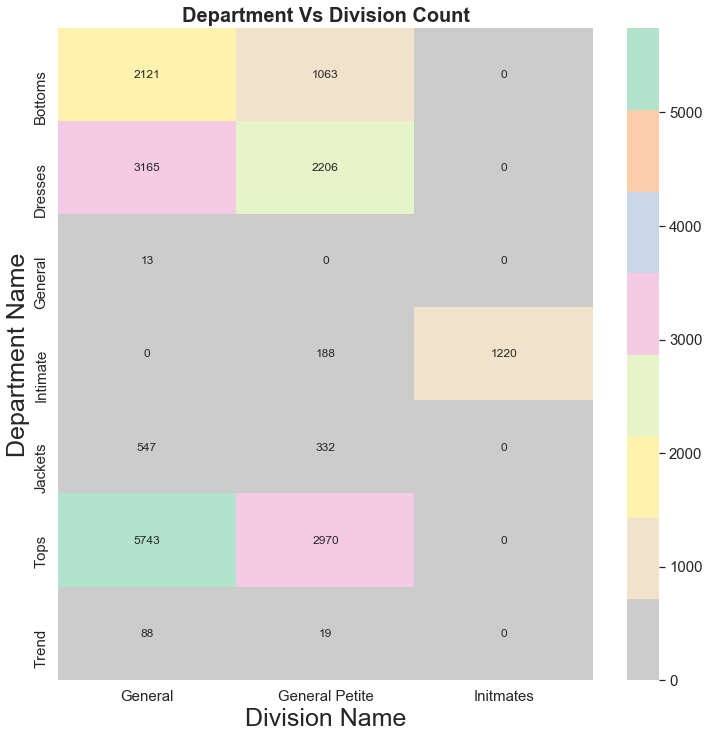

In [22]:
# Department Vs Division Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Department Name'], womens_clothing_data["Division Name"]),
            annot=True,fmt='g', cmap="Pastel2_r")
plt.title("Department Vs Division Count",fontsize=20,fontweight='bold')

plt.show()

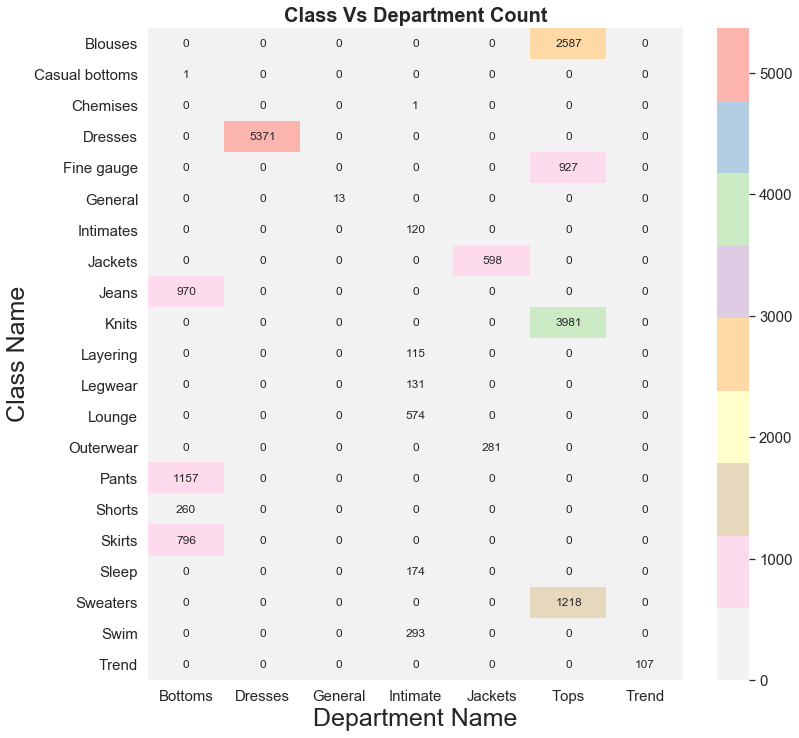

In [23]:
# Class Vs Department Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Class Name'], womens_clothing_data["Department Name"]),
            annot=True,fmt='g', cmap="Pastel1_r")
plt.title("Class Vs Department Count",fontsize=20,fontweight='bold')
plt.show()

# Identify Positive and Negative Sentiment from Titles

In [24]:
# creating functions to be used for wordcloud and tokenization
def tokenize(text):
    stop_words = set(stopwords.words('english'))
    
    token =word_tokenize(text)
    
    word_token = []

    for w in token:
        if w not in stop_words and not w.isdigit() and w.isalnum() :
            word_token.append(str(w))
    
    freq = nltk.FreqDist(word_token)
    
    new_list = []
    for k,v in freq.items():
        if v >= 1:
            new_list.append(k)
    
    freq.plot(10,cumulative=False)
    plt.show()
    
    return (str(new_list))

def wordcloud(text,my_mask=None):
    wordcloud = WordCloud(width=1000,height=900,max_words=40,collocations=False,
    min_font_size=10,contour_width=2, contour_color='cadetblue',mask=my_mask,background_color='black').generate(text)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

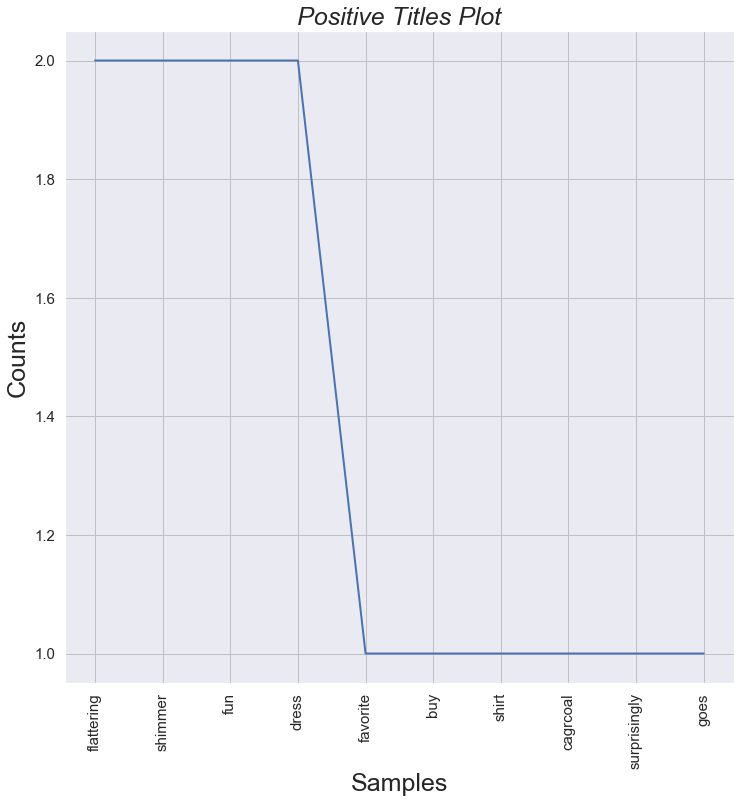

In [25]:
# positive titles plot based on positive word
positive = womens_clothing_data[(womens_clothing_data['Rating'] >2) & 
                        (womens_clothing_data['Recommended IND'] ==1) & 
                       (womens_clothing_data['Sentiment'] =='Positive')]

plt.title("Positive Titles Plot",fontsize=25,fontstyle='oblique');
ret_text = tokenize(str(positive['Title']).lower())

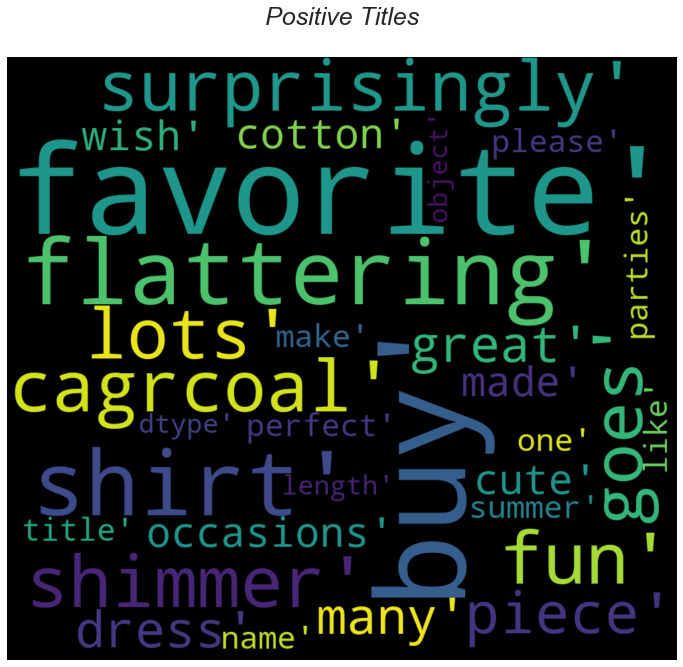

In [26]:
# positive word cloud
plt.title("Positive Titles\n",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

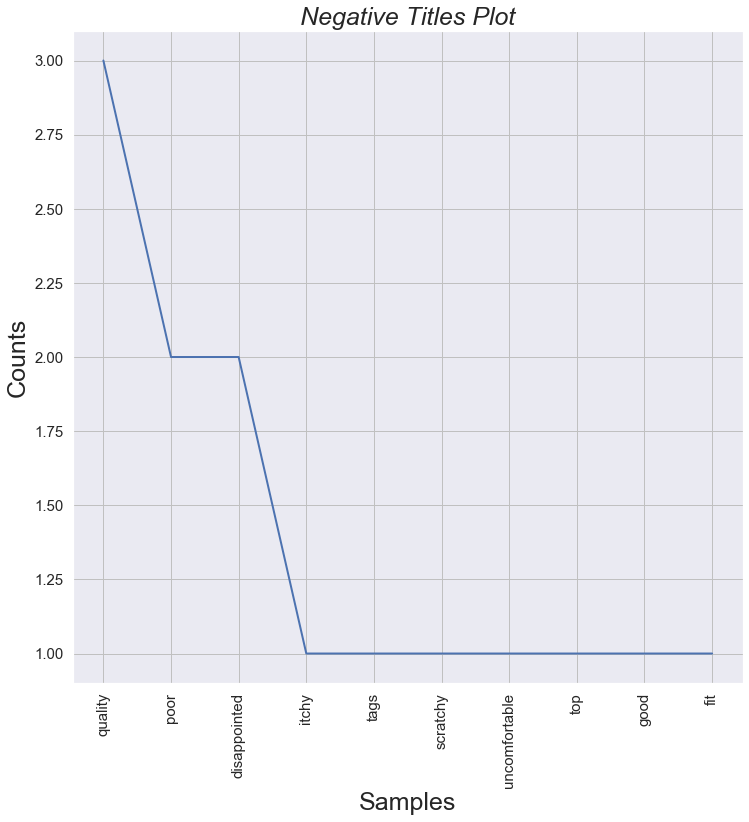

In [27]:
# negativee titles plot based on negative word
negative = womens_clothing_data[(womens_clothing_data['Rating'] < 2) & 
                        (womens_clothing_data['Recommended IND'] == 0) & 
                       (womens_clothing_data['Sentiment'] =='Negative')]

plt.title("Negative Titles Plot",fontsize=25,fontstyle='oblique')
ret_text = tokenize(str(negative['Title']).lower())

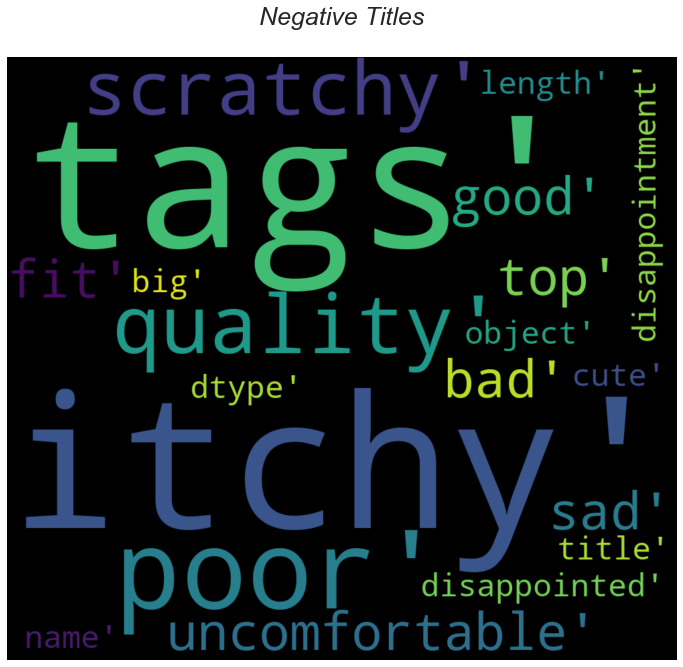

In [28]:
# Negative word cloud
plt.title("Negative Titles\n",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

# Cloud of Review Text feature

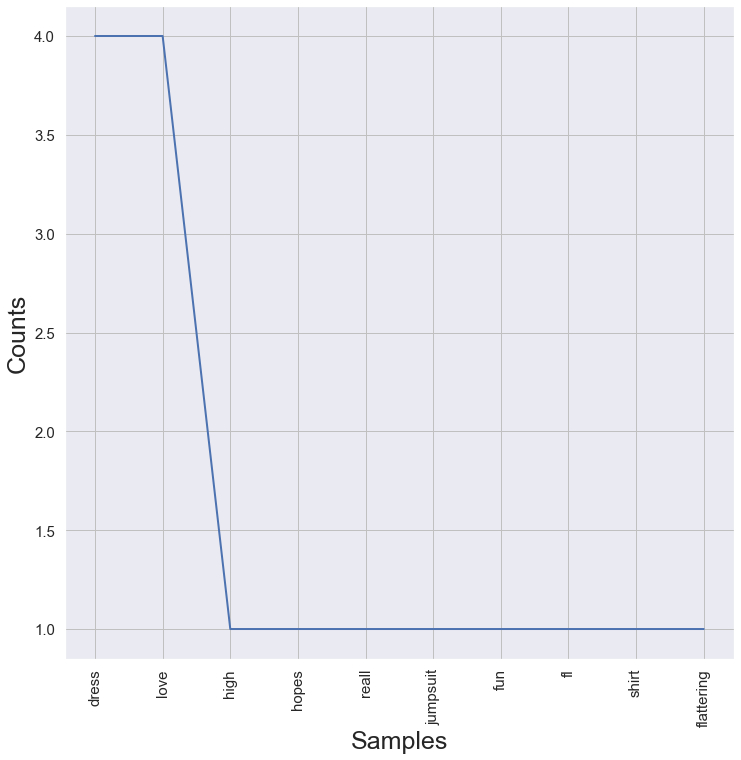

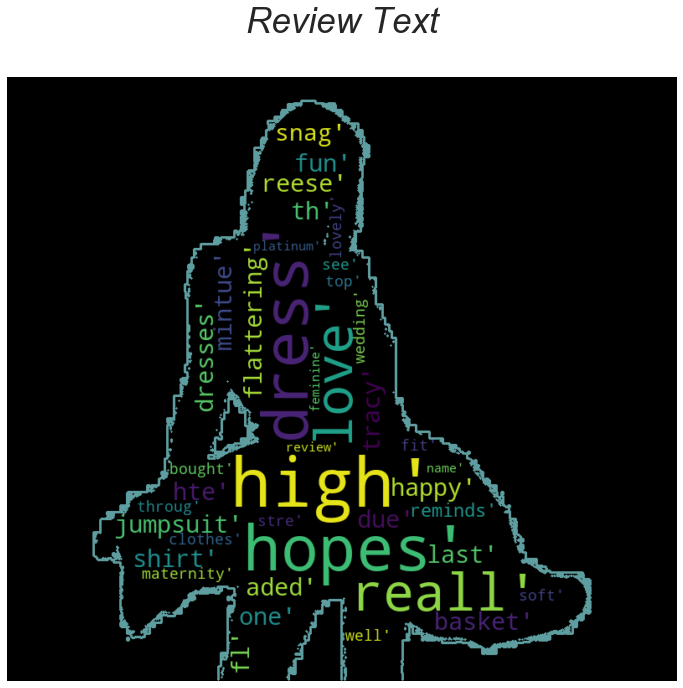

In [29]:
my_mask = np.array(Image.open("woman-in-dress.jpg"))
ret_text = tokenize(str(womens_clothing_data['Review Text']).lower())
plt.title("Review Text\n",fontsize=35,fontstyle='oblique')
wordcloud(ret_text, my_mask)

# Machine learning Analysis & Benchmark

### We will feed our dataset to various ML models e.g. Naive Bayes, Logistic Regression etc. and compare which model is most accurate

In [30]:
# cleaning up review text
sw = set(stopwords.words('english'))

def preproc(data):
    #converting all to lowercase
    data = data.lower() 
    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]
    
    
    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

In [31]:
womens_clothing_data['Revised Text'] = womens_clothing_data['Review Text'].apply(preproc)

In [32]:
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score,Sentiment,Revised Text
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0000,Neutral,high hope dress really want work initially ord...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5093,Positive,love love love jumpsuit fun flirty fabulous ev...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.3182,Positive,shirt flat due adjustable front tie perfect le...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.0000,Neutral,love tracy reese dress one petite foot tall us...
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.5106,Positive,aded basket hte last mintue see would look lik...


In [33]:
revised_text, sentiment_class = womens_clothing_data["Revised Text"], womens_clothing_data["Sentiment"]

In [34]:
revised_text

2        high hope dress really want work initially ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flat due adjustable front tie perfect le...
5        love tracy reese dress one petite foot tall us...
6        aded basket hte last mintue see would look lik...
                               ...                        
23481    happy snag dress great price easy slip flat cu...
23482    remind maternity clothe soft stretchy shiny ma...
23483    fit well top see never would work glad able tr...
23484    buy dress wed summer cute unfortunately fit pe...
23485    dress lovely platinum feminine fit perfectly e...
Name: Revised Text, Length: 19675, dtype: object

In [35]:
sentiment_class

2         Neutral
3        Positive
4        Positive
5         Neutral
6        Positive
           ...   
23481    Positive
23482    Positive
23483    Positive
23484    Positive
23485    Positive
Name: Sentiment, Length: 19675, dtype: object

In [36]:
# splitting the train & test data to 75-25% split (X, y)
train_revised_text = revised_text[:16980]
test_revised_text = revised_text[16981:22640]
train_sentiment_class = sentiment_class[:16980]
test_sentiment_class = sentiment_class[16981:22640]

## Processing TD-IDF Matrix

In [37]:
# extracting feature
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_revised_text)
X_train_counts.shape

(16980, 8993)

In [38]:
count_vect.vocabulary_.get('dress')

2347

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16980, 8993)

### Naive Bayes.

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_sentiment_class)

In [41]:
# Accuracy score
from sklearn.metrics import accuracy_score
X_test_counts = count_vect.transform(test_revised_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(test_sentiment_class, predito)
print(gaussian_acc)

0.6945063103192279


### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train_tfidf, train_sentiment_class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# Accuracy score
X_test_counts = count_vect.transform(test_revised_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = ran.predict(X_test_tfidf)
ran_acc = accuracy_score(test_sentiment_class, predito)
print(ran_acc)

0.6952487008166296


### Support Vector Machine

In [48]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_tfidf, train_sentiment_class)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
# Accuracy score
X_test_counts = count_vect.transform(test_revised_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = svm.predict(X_test_tfidf)
svm_acc = accuracy_score(test_sentiment_class, predito)
print(svm_acc)

0.6937639198218263


### Neural network

In [50]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train_tfidf, train_sentiment_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
# Accuracy score
X_test_counts = count_vect.transform(test_revised_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = nn.predict(X_test_tfidf)
nn_acc = accuracy_score(test_sentiment_class, predito)
print(nn_acc)

0.64996288047513


### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, train_sentiment_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Accuracy score
X_test_counts = count_vect.transform(test_revised_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(test_sentiment_class, predito)
print(lr_acc)

0.6978470675575352


In [54]:
# comparing various ML models
best_model = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Neural Network'],
    'Score': [svm_acc, lr_acc, 
              ran_acc, gaussian_acc, nn_acc]})
best_model.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.697847
2,Random Forest,0.695249
3,Naive Bayes,0.694506
0,Support Vector Machines,0.693764
4,Neural Network,0.649963


# Conclusion: The ranking above show us that Logistic Regression was the most accurate model and Neural Network was the worse.